# Deep Learning-Based Metal Classification via Microstructure Analysis

### Using Convolution Neural Network (CNN) for precise metal classification based on microstructural image analysis.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Dataset path
dataset_path = r'C:\D drive\Data scientist\Projects\microstructure_dataset'

# Visualizing first 10 images
def visualize_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'Class: {labels[i]}')
        plt.axis('off')
    plt.show()

In [3]:
# Scaling and loading the dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 86 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


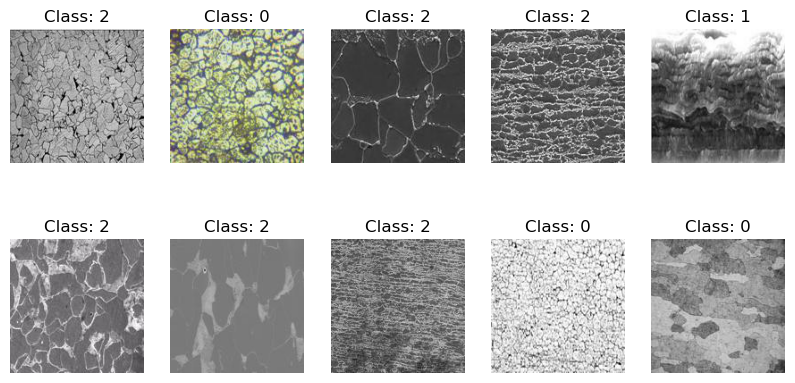

In [4]:
sample_images, sample_labels = next(train_generator)
visualize_images(sample_images, np.argmax(sample_labels, axis=1))

In [5]:
# Break the dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    sample_images, np.argmax(sample_labels, axis=1), test_size=0.2, random_state=42
)

In [6]:
# Model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # For 3 classes

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100


1/1 [==============================] - 1s 1s/step - loss: 1.0613 - accuracy: 0.4000 - val_loss: 9.1559 - val_accuracy: 0.2857
Epoch 2/100
1/1 [==============================] - 0s 216ms/step - loss: 5.0547 - accuracy: 0.5200 - val_loss: 1.7772 - val_accuracy: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 216ms/step - loss: 1.9795 - accuracy: 0.3200 - val_loss: 1.0223 - val_accuracy: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 216ms/step - loss: 1.1037 - accuracy: 0.3200 - val_loss: 1.1867 - val_accuracy: 0.2857
Epoch 5/100
1/1 [==============================] - 0s 216ms/step - loss: 0.9746 - accuracy: 0.5200 - val_loss: 1.5378 - val_accuracy: 0.2857
Epoch 6/100
1/1 [==============================] - 0s 223ms/step - loss: 1.0491 - accuracy: 0.5200 - val_loss: 1.3485 - val_accuracy: 0.2857
Epoch 7/100
1/1 [==============================] - 0s 200ms/step - loss: 0.9799 - accuracy: 0.5200 - val_loss: 1.2101 - val_accuracy: 0.2857
Epoch 8/100
1/

In [9]:
# Generate predictions on the validation set
y_pred = model.predict(X_test)
predictions = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 106ms/step


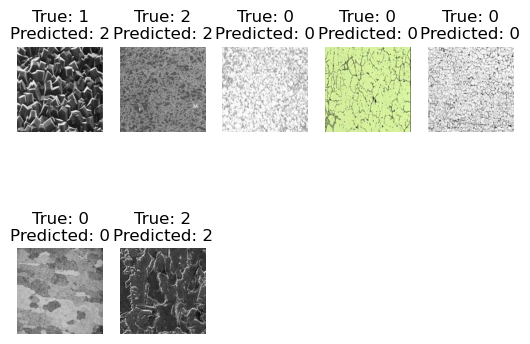

In [10]:
# Visualizing some predictions
num_visualizations = min(len(X_test), 10)
for i in range(num_visualizations):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'True: {y_test[i]}\nPredicted: {predictions[i]}')
    plt.axis('off')


In [11]:
# Evaluate the test accuracy
test_accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8571428571428571


In [12]:
# Load a new input image with preprocessing to classify it
def preprocess_input_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array

# Load a new image
new_image_path = r'C:\D drive\Data scientist\Projects\test_image.png'
input_image = preprocess_input_image(new_image_path)

# Make predictions on the new image
new_image_prediction = model.predict(input_image)
predicted_class = np.argmax(new_image_prediction)
print(f'Predicted Class: {predicted_class}')


1/1 [==============================] - 0s 31ms/step
Predicted Class: 2


In [13]:
class_mapping = {0: "Aluminium", 1: "Diamond", 2: "Steel"}
predicted_label = class_mapping[predicted_class]
print(f"The predicted label is: {predicted_label}")

The predicted label is: Steel
